In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import plotly.graph_objs as go
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# pip install scikit-learn==1.3.2

**Exploratory Data Analysis**

In [ ]:
file_path = '/content/flood.csv'
df = pd.read_csv(file_path)

**About the dataset**

*   The dataset contains 50,000 entries with 21 columns in total.
There are 20 feature columns and 1 target column (FloodProbability).
*   20 columns are of type int64.
The target variable, FloodProbability, is of type float64.



In [ ]:
df.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
df.describe()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


**Data Cleaning**

In [ ]:
isna = df.isna().sum().reset_index(name="missing_values")
isna['percentage'] = round((isna['missing_values'] / df.shape[0]) * 100, 2)

# Sort the 'isna' DataFrame by the 'missing_values' column in descending order and display the top 35 rows
isna.sort_values(by='missing_values', ascending=False)

,index,missing_values,percentage
0,MonsoonIntensity,0,0.0
11,DrainageSystems,0,0.0
19,PoliticalFactors,0,0.0
18,InadequatePlanning,0,0.0
17,WetlandLoss,0,0.0
16,PopulationScore,0,0.0
15,DeterioratingInfrastructure,0,0.0
14,Watersheds,0,0.0
13,Landslides,0,0.0
12,CoastalVulnerability,0,0.0


In [ ]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
df.dtypes

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
PredictedFloodProbability(%)       float32
dtype: object



*   We can see there are no missing values in the dataset
*   All feature values are numeric.



**Histogram Analysis**

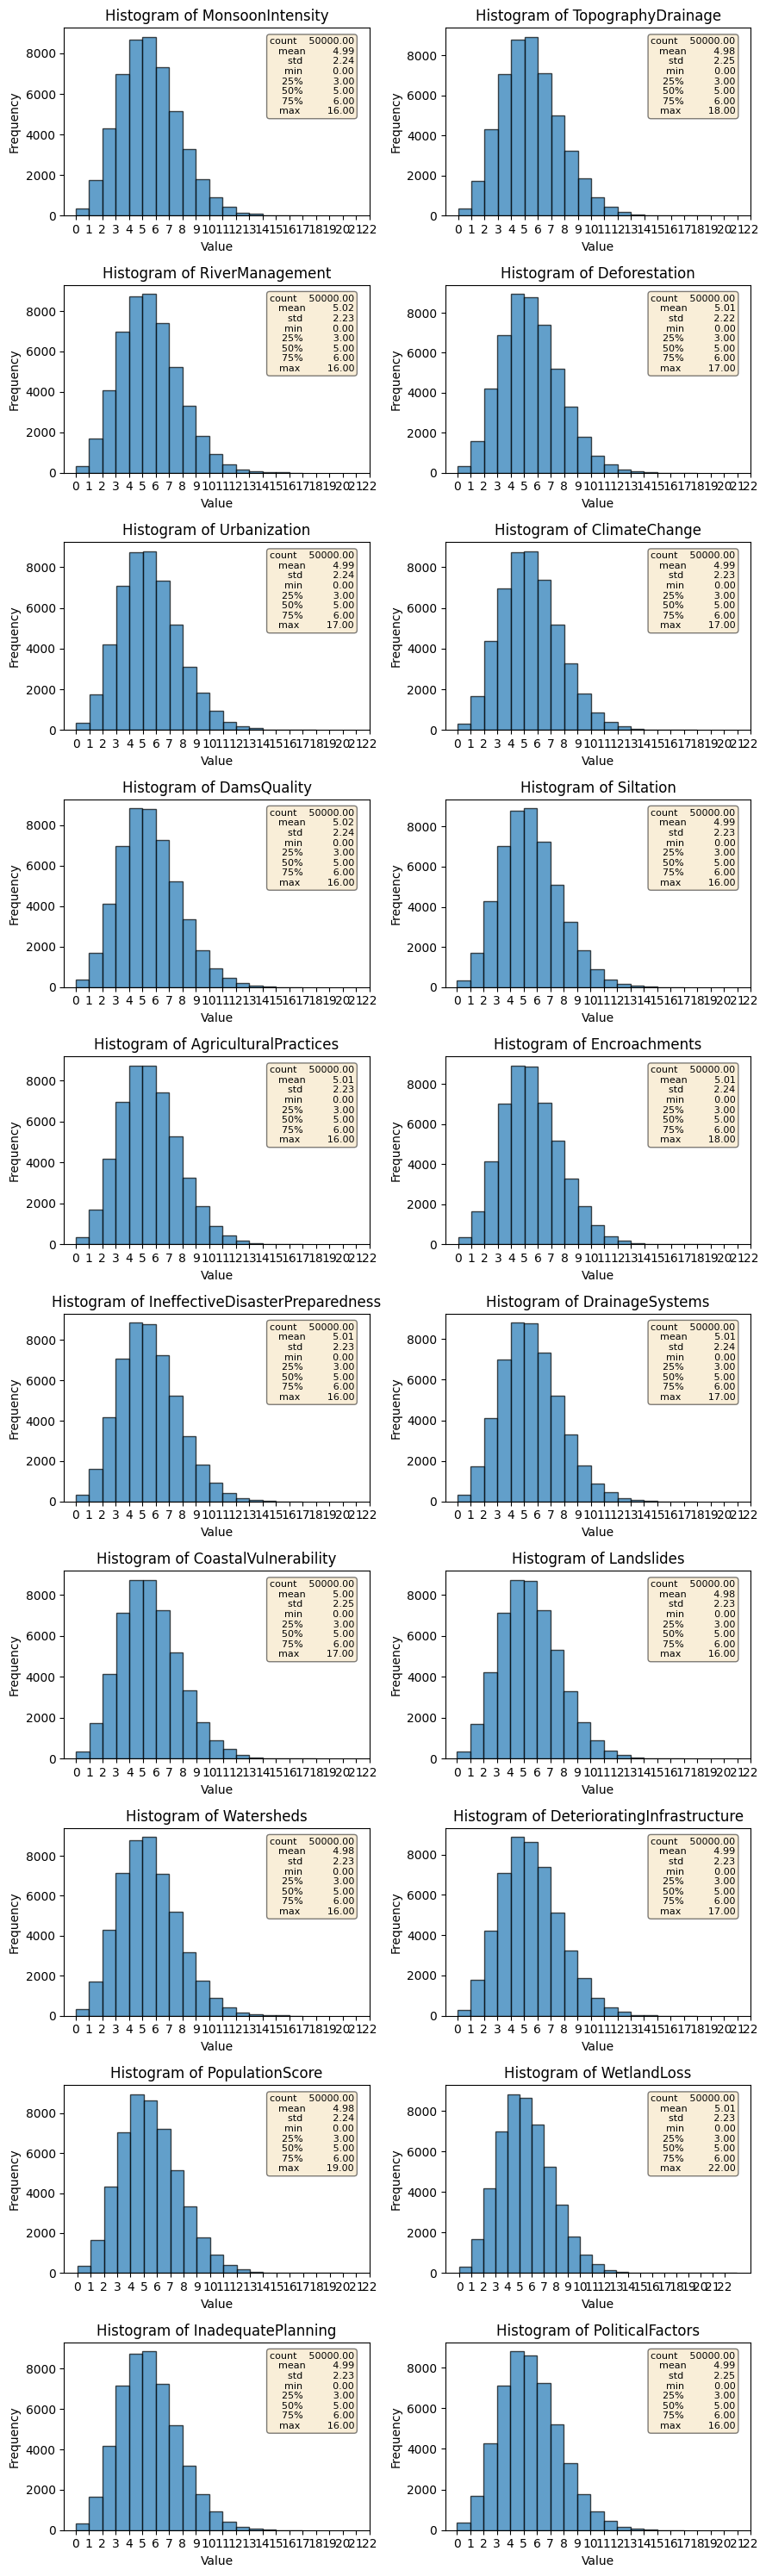

In [ ]:
columns = df.drop('FloodProbability', axis=1).columns
n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(9, n_rows * 3))
axes = axes.flatten()

# Plot histograms for each column except 'FloodProbability'
for i, column in enumerate(columns):
    ax = axes[i]
    col_data = df[column]
    ax.hist(col_data, bins=np.arange(col_data.min(), col_data.max() + 2), edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_xticks(np.arange(0, 23, 1))  # Set x-ticks from 0 to 22

    # Summary statistics text
    summary_text = col_data.describe().apply(lambda x: f'{x:.2f}').to_string()
    ax.text(0.95, 0.95, summary_text, transform=ax.transAxes, fontsize=8,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove any unused subplots
for ax in axes[len(columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

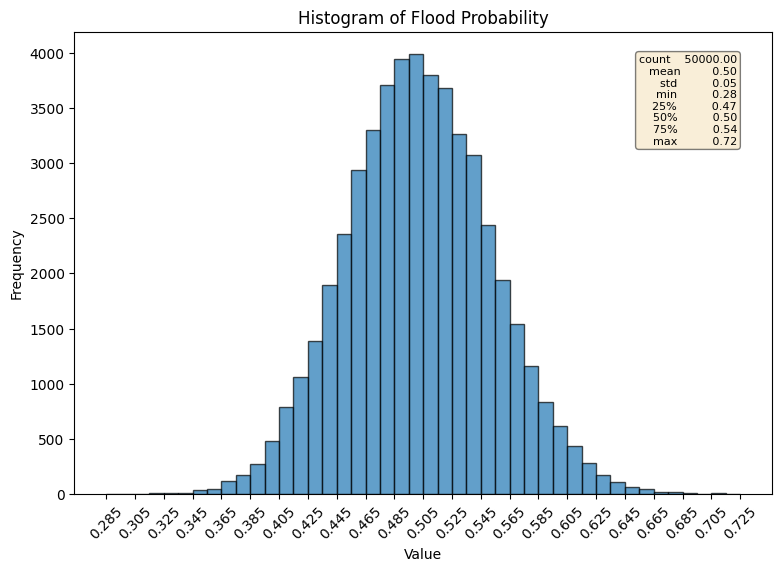

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
bins = np.linspace(df['FloodProbability'].min(), df['FloodProbability'].max(), 45) # min, max, bar count

# Plot FloodProbability
ax.hist(df['FloodProbability'], bins=bins, alpha=0.7, edgecolor='k')
ax.set_title(f'Histogram of Flood Probability')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_xticks(bins[::2])
ax.tick_params(axis='x', rotation=45)

# Summary statistics text
summary_text = df['FloodProbability'].describe().apply(lambda x: f'{x:.2f}').to_string()
ax.text(0.95, 0.95, summary_text, transform=ax.transAxes, fontsize=8,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

**Correlation Analysis**

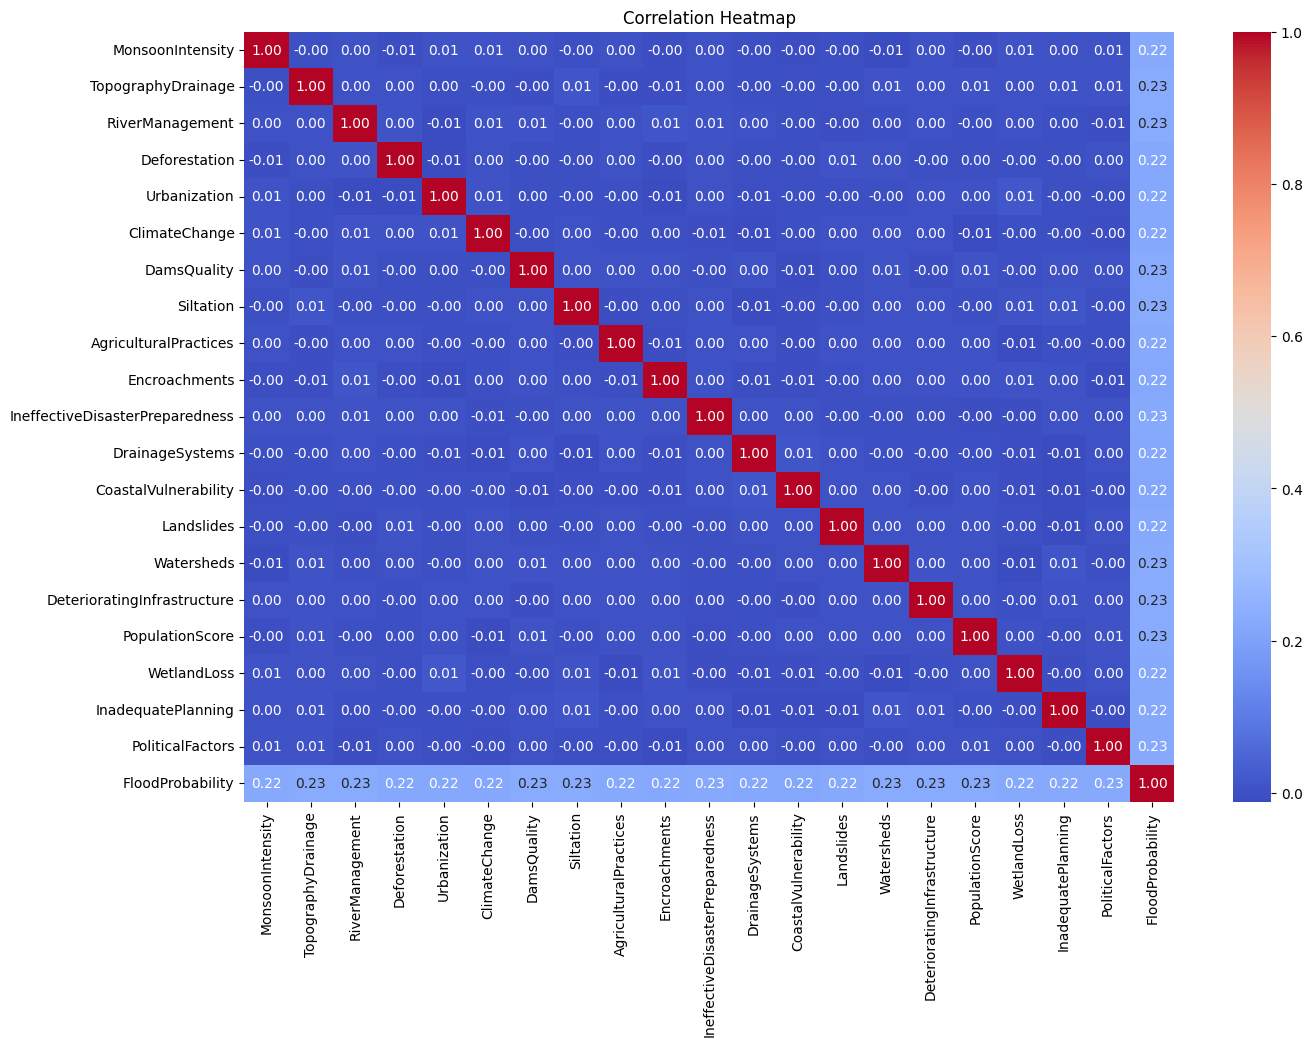

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



*   The correlations between individual features and Flood Probability appear to be relatively consistent, with no single feature showing a substantially stronger relationship than the others.
*   Hence all the features can be considered for further analysis.

In [ ]:
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest
# from sklearn.preprocessing import KBinsDiscretizer  # Import discretizer

# X = df.drop(columns=['FloodProbability'])
# y = df['FloodProbability']

# # Discretize the target variable into bins
# discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # Adjust n_bins as needed
# y_discretized = discretizer.fit_transform(y.values.reshape(-1, 1))  # Reshape for single feature

# # Apply Chi-Square test
# chi2_selector = SelectKBest(chi2, k=3)
# X_kbest = chi2_selector.fit_transform(X, y_discretized.ravel())  # Ravel to flatten the array
# print(X_kbest)


**Exploraton of Performance with different Models**

In [ ]:
# Define the features and target variable
X = numeric_df.drop(columns=['FloodProbability'])
y = numeric_df['FloodProbability']

**Linear Regression**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the prediction accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE and R2 Values using Linear Regression are",mse,"&", r2)

MSE and R2 Values using Linear Regression are 1.5916809506789424e-32 & 1.0


Since R2 value is 1 and also mean sqaured error is around 1.5 we could say that the model is performing good.

**Random Forest**

In [ ]:
forest = RandomForestRegressor(random_state=0)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mse = -cv_scores
print(f'Random Forest 10-Fold CV MSE: Mean = {cv_mse.mean()}, Std = {cv_mse.std()}')


Random Forest 10-Fold CV MSE: Mean = 0.0006765838344375005, Std = 1.2624424429111165e-05


In [ ]:
print(X_train.columns)

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')


In [ ]:
print(y_train.head())

39087    0.455
30893    0.495
45278    0.520
16398    0.480
13653    0.415
Name: FloodProbability, dtype: float64


In [ ]:
# Train and predict
forest.fit(X_train, y_train)
Y_pred = forest.predict(X_test)

# Evaluation metrics
print(f'Random Forest Test MSE: {mean_squared_error(y_test, Y_pred)}')
print(f'Random Forest Test MAE: {mean_absolute_error(y_test, Y_pred)}')
print(f'Random Forest Test R²: {r2_score(y_test, Y_pred)}')

KeyboardInterrupt: 

In [ ]:
# Predict flood probabilities on the full dataset
df['PredictedFloodProbability(%)'] = forest.predict(X)

# Display predictions
print(df[['PredictedFloodProbability(%)']].head())

   PredictedFloodProbability(%)
0                       0.45645
1                       0.48305
2                       0.51695
3                       0.51795
4                       0.48150


In [ ]:
# Feature importances
forest_importances = pd.Series(forest.feature_importances_, index=X.columns)
fig = px.bar(forest_importances, title="Random Forest Feature Importances", labels={'index': 'Features', 'value': 'Importance'})
fig.show()

In [ ]:
# Interactive plot for Actual vs. Predicted Values
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                 title='Actual vs. Predicted Flood Probability on train-test Dataset')
fig.add_shape(type='line', line=dict(dash='dash', color='red'), x0=y_test.min(), y0=y_test.min(), x1=y_test.max(), y1=y_test.max())
fig.show()

In [ ]:
# Comparison DataFrame
comparison = pd.DataFrame({'Actual Flood Probability (%)': y_test, 'Predicted Flood Probability (%)': y_pred})
print(comparison.head())

       Actual Flood Probability (%)  Predicted Flood Probability (%)
33553                         0.455                            0.455
9427                          0.495                            0.495
199                           0.470                            0.470
12447                         0.460                            0.460
39489                         0.465                            0.465


**XGBRegressor**

In [ ]:
# Instantiate the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Define 10-Fold Cross-Validation on training data
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mse = -cv_scores

# Print mean and standard deviation of MSE from CV
print(f'XGBoost 10-Fold CV MSE: Mean = {cv_mse.mean()}, Std = {cv_mse.std()}')

XGBoost 10-Fold CV MSE: Mean = 0.00018597098062939272, Std = 3.1724227667770165e-06


In [ ]:
# Train on full training set and evaluate on test set
xgb_model.fit(X_train, y_train)
Y_pred = xgb_model.predict(X_test)

# Evaluation metrics
test_mse = mean_squared_error(y_test, Y_pred)
test_mae = mean_absolute_error(y_test, Y_pred)
test_r2 = r2_score(y_test, Y_pred)
print(f'XGBoost Test MSE: {test_mse}')
print(f'XGBoost Test MAE: {test_mae}')
print(f'XGBoost Test R²: {test_r2}')

XGBoost Test MSE: 0.00018627406166298944
XGBoost Test MAE: 0.010814186096787453
XGBoost Test R²: 0.9252087336762307


In [ ]:
# Comparing predicted vs actual values
comparison = pd.DataFrame({'Actual Flood Probability (%)': y_test, 'Predicted Flood Probability (%)': Y_pred})
print(comparison.head())

       Actual Flood Probability (%)  Predicted Flood Probability (%)
33553                         0.455                         0.452013
9427                          0.495                         0.491667
199                           0.470                         0.480156
12447                         0.460                         0.456990
39489                         0.465                         0.452890


In [ ]:
# Predict flood probabilities on the full dataset (or on new data)
predictions = xgb_model.predict(X)

# Display predictions
df['PredictedFloodProbability(%)'] = predictions
print(df[['PredictedFloodProbability(%)']].head())


   PredictedFloodProbability(%)
0                      0.447479
1                      0.461486
2                      0.516383
3                      0.508744
4                      0.448355


In [ ]:
# Feature importances
feature_names = list(X.columns)
importances = xgb_model.feature_importances_

# Plot feature importances using Plotly
xgb_importances = pd.Series(importances, index=feature_names)
fig = px.bar(xgb_importances, title="XGBoost Feature Importances", labels={'index': 'Features', 'value': 'Importance'})
fig.show()

In [ ]:
# Interactive plot for Actual vs. Predicted Values
fig = px.scatter(x=y_test, y=Y_pred, labels={'x': 'Actual Flood Probability (%)', 'y': 'Predicted Flood Probability (%)'},
                 title='Actual vs. Predicted Flood Probability')
fig.add_shape(type='line', line=dict(dash='dash', color='red'),
              x0=y_test.min(), y0=y_test.min(), x1=y_test.max(), y1=y_test.max())
fig.show()

saving the model


In [ ]:
filename = 'forest.sav'
pickle.dump(forest, open(filename, 'wb'))

In [ ]:
flood_model = pickle.load(open('forest.sav', 'rb'))